In [1]:
import numpy as np
import pandas as pd

In [2]:
# Load datasets package from scikit-learn
from sklearn import datasets

In [3]:
data = datasets.load_breast_cancer()
X = pd.DataFrame(data.data, columns = data.feature_names)

In [4]:
print(data.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [5]:
print(data.target_names)

['malignant' 'benign']


In [6]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
X.isna().any()

mean radius                False
mean texture               False
mean perimeter             False
mean area                  False
mean smoothness            False
mean compactness           False
mean concavity             False
mean concave points        False
mean symmetry              False
mean fractal dimension     False
radius error               False
texture error              False
perimeter error            False
area error                 False
smoothness error           False
compactness error          False
concavity error            False
concave points error       False
symmetry error             False
fractal dimension error    False
worst radius               False
worst texture              False
worst perimeter            False
worst area                 False
worst smoothness           False
worst compactness          False
worst concavity            False
worst concave points       False
worst symmetry             False
worst fractal dimension    False
dtype: boo

# One-Hot Encoding

In [8]:
X_enc = pd.get_dummies(X)

In [9]:
X_enc.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [10]:
X_enc.mean(axis = 0)

mean radius                 14.127292
mean texture                19.289649
mean perimeter              91.969033
mean area                  654.889104
mean smoothness              0.096360
mean compactness             0.104341
mean concavity               0.088799
mean concave points          0.048919
mean symmetry                0.181162
mean fractal dimension       0.062798
radius error                 0.405172
texture error                1.216853
perimeter error              2.866059
area error                  40.337079
smoothness error             0.007041
compactness error            0.025478
concavity error              0.031894
concave points error         0.011796
symmetry error               0.020542
fractal dimension error      0.003795
worst radius                16.269190
worst texture               25.677223
worst perimeter            107.261213
worst area                 880.583128
worst smoothness             0.132369
worst compactness            0.254265
worst concav

In [11]:
X_enc = X_enc.drop(['mean smoothness', 'mean compactness', 'mean concavity',
                    'mean concave points', 'mean symmetry', 'mean fractal dimension',
                    'radius error', 'smoothness error', 'compactness error',
                    'concavity error', 'concave points error', 'symmetry error',
                    'fractal dimension error', 'worst smoothness', 'worst compactness',
                    'worst concavity', 'worst concave points', 'worst symmetry',
                    'worst fractal dimension'], axis = 1)

In [12]:
X_enc.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'texture error', 'perimeter error', 'area error', 'worst radius',
       'worst texture', 'worst perimeter', 'worst area'],
      dtype='object')

In [13]:
X_enc.mean(axis = 0)

mean radius         14.127292
mean texture        19.289649
mean perimeter      91.969033
mean area          654.889104
texture error        1.216853
perimeter error      2.866059
area error          40.337079
worst radius        16.269190
worst texture       25.677223
worst perimeter    107.261213
worst area         880.583128
dtype: float64

In [14]:
X = X_enc
y = data.target

In [15]:
X

,mean radius,mean texture,mean perimeter,mean area,texture error,perimeter error,area error,worst radius,worst texture,worst perimeter,worst area
0,17.99,10.38,122.80,1001.0,0.9053,8.589,153.40,25.380,17.33,184.60,2019.0
1,20.57,17.77,132.90,1326.0,0.7339,3.398,74.08,24.990,23.41,158.80,1956.0
2,19.69,21.25,130.00,1203.0,0.7869,4.585,94.03,23.570,25.53,152.50,1709.0
3,11.42,20.38,77.58,386.1,1.1560,3.445,27.23,14.910,26.50,98.87,567.7
4,20.29,14.34,135.10,1297.0,0.7813,5.438,94.44,22.540,16.67,152.20,1575.0
...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,1.2560,7.673,158.70,25.450,26.40,166.10,2027.0
565,20.13,28.25,131.20,1261.0,2.4630,5.203,99.04,23.690,38.25,155.00,1731.0
566,16.60,28.08,108.30,858.1,1.0750,3.425,48.55,18.980,34.12,126.70,1124.0
567,20.60,29.33,140.10,1265.0,1.5950,5.772,86.22,25.740,39.42,184.60,1821.0


# Feature Selection: by Variance Threshold

In [16]:
from sklearn.feature_selection import VarianceThreshold

In [17]:
selector = VarianceThreshold()

In [18]:
XVarianceThreshold = selector.fit_transform(X)

In [19]:
XVarianceThreshold.shape

(569, 11)

# Feature Selection: by Mutual Information/Information Gain

In [20]:
from sklearn.feature_selection import mutual_info_classif

In [21]:
XMutualInformationValue = mutual_info_classif(X, y)

In [22]:
XMutualInformationValue

array([0.36947401, 0.09209105, 0.40660155, 0.36035555, 0.        ,
       0.27430239, 0.3403056 , 0.45150074, 0.12196012, 0.4750274 ,
       0.46423518])

In [23]:
XMutualInformation = X

In [24]:
XMutualInformation

,mean radius,mean texture,mean perimeter,mean area,texture error,perimeter error,area error,worst radius,worst texture,worst perimeter,worst area
0,17.99,10.38,122.80,1001.0,0.9053,8.589,153.40,25.380,17.33,184.60,2019.0
1,20.57,17.77,132.90,1326.0,0.7339,3.398,74.08,24.990,23.41,158.80,1956.0
2,19.69,21.25,130.00,1203.0,0.7869,4.585,94.03,23.570,25.53,152.50,1709.0
3,11.42,20.38,77.58,386.1,1.1560,3.445,27.23,14.910,26.50,98.87,567.7
4,20.29,14.34,135.10,1297.0,0.7813,5.438,94.44,22.540,16.67,152.20,1575.0
...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,1.2560,7.673,158.70,25.450,26.40,166.10,2027.0
565,20.13,28.25,131.20,1261.0,2.4630,5.203,99.04,23.690,38.25,155.00,1731.0
566,16.60,28.08,108.30,858.1,1.0750,3.425,48.55,18.980,34.12,126.70,1124.0
567,20.60,29.33,140.10,1265.0,1.5950,5.772,86.22,25.740,39.42,184.60,1821.0


In [25]:
XMutualInformation.loc[569] = XMutualInformationValue

In [26]:
XMutualInformation = XMutualInformation.drop([col for col in X.columns if X[col][569] == 0], axis = 1)

In [27]:
XMutualInformation = XMutualInformation.drop(569)

In [28]:
XMutualInformation = XMutualInformation.replace(to_replace = [0.0], value = 0)
XMutualInformation = XMutualInformation.replace(to_replace = [1.0], value = 1)

In [29]:
XMutualInformation = XMutualInformation.astype(int)

In [30]:
XMutualInformation

,mean radius,mean texture,mean perimeter,mean area,perimeter error,area error,worst radius,worst texture,worst perimeter,worst area
0,17,10,122,1001,8,153,25,17,184,2019
1,20,17,132,1326,3,74,24,23,158,1956
2,19,21,130,1203,4,94,23,25,152,1709
3,11,20,77,386,3,27,14,26,98,567
4,20,14,135,1297,5,94,22,16,152,1575
...,...,...,...,...,...,...,...,...,...,...
564,21,22,142,1479,7,158,25,26,166,2027
565,20,28,131,1261,5,99,23,38,155,1731
566,16,28,108,858,3,48,18,34,126,1124
567,20,29,140,1265,5,86,25,39,184,1821


In [31]:
X = X.astype(int)
X = X.drop(569)

# X hasil variance threshold (X)

In [32]:
# Memisahkan dataset ke dalam set training dan set testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 1)

In [33]:
X_train

,mean radius,mean texture,mean perimeter,mean area,texture error,perimeter error,area error,worst radius,worst texture,worst perimeter,worst area
164,23,22,152,1686,0,4,97,28,28,184,2403
13,15,23,103,782,1,2,36,16,27,112,876
430,14,22,102,685,0,3,24,16,27,125,832
61,8,20,54,221,2,2,18,9,27,62,273
427,10,21,68,359,1,2,20,12,32,83,489
...,...,...,...,...,...,...,...,...,...,...,...
129,19,25,130,1192,1,2,63,22,33,148,1589
144,10,14,68,355,1,1,17,11,20,77,441
72,17,24,114,929,1,3,69,23,33,151,1681
235,14,21,89,603,1,1,22,15,30,98,715


In [34]:
# Melatih model dengan set training
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [35]:
# Membuat prediksi hasil set training
predictions = gnb.predict(X_test)

In [36]:
# Membandingkan hasil prediksi dan label sesungguhnya
from sklearn.metrics import classification_report, confusion_matrix

In [37]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.81      0.88        80
           1       0.91      0.98      0.94       148

    accuracy                           0.92       228
   macro avg       0.93      0.90      0.91       228
weighted avg       0.92      0.92      0.92       228



In [38]:
print(confusion_matrix(y_test, predictions))

[[ 65  15]
 [  3 145]]


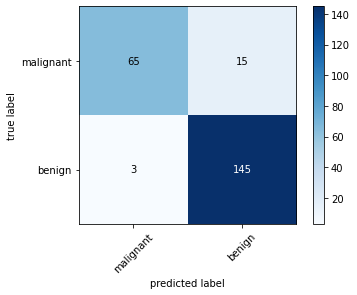

In [41]:
from mlxtend.plotting import plot_confusion_matrix

myarray = np.asarray(y_test)
matrix = confusion_matrix((myarray), (predictions))

class_names = ['malignant', 'benign']

fig, ax = plot_confusion_matrix(conf_mat = matrix,
                                show_absolute = True,
                                show_normed = False,
                                colorbar = True,
                                class_names = class_names)

# X hasil Mutual Information

In [42]:
# Memisahkan dataset ke dalam set training dan set testing
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(XMutualInformation, y, test_size = 0.4, random_state = 1)

In [43]:
X_train2

,mean radius,mean texture,mean perimeter,mean area,perimeter error,area error,worst radius,worst texture,worst perimeter,worst area
164,23,22,152,1686,4,97,28,28,184,2403
13,15,23,103,782,2,36,16,27,112,876
430,14,22,102,685,3,24,16,27,125,832
61,8,20,54,221,2,18,9,27,62,273
427,10,21,68,359,2,20,12,32,83,489
...,...,...,...,...,...,...,...,...,...,...
129,19,25,130,1192,2,63,22,33,148,1589
144,10,14,68,355,1,17,11,20,77,441
72,17,24,114,929,3,69,23,33,151,1681
235,14,21,89,603,1,22,15,30,98,715


In [44]:
# Melatih model dengan set training
from sklearn.naive_bayes import GaussianNB
gnb2 = GaussianNB()
gnb2.fit(X_train2, y_train2)

GaussianNB()

In [45]:
predictions2 = gnb2.predict(X_test2)

In [46]:
print(classification_report(y_test2, predictions2))

              precision    recall  f1-score   support

           0       0.96      0.81      0.88        80
           1       0.91      0.98      0.94       148

    accuracy                           0.92       228
   macro avg       0.93      0.90      0.91       228
weighted avg       0.92      0.92      0.92       228



In [48]:
print(confusion_matrix(y_test2, predictions2))

[[ 65  15]
 [  3 145]]


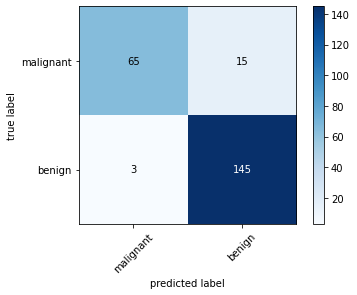

In [49]:
from mlxtend.plotting import plot_confusion_matrix

myarray = np.asarray(y_test)
matrix = confusion_matrix((myarray), (predictions))

class_names = ['malignant', 'benign']

fig, ax = plot_confusion_matrix(conf_mat = matrix,
                                show_absolute = True,
                                show_normed = False,
                                colorbar = True,
                                class_names = class_names)

# Evaluasi Model dengan Repeated 5-fold cross-validation

In [50]:
from numpy import mean
from numpy import std
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

# prepare the cross-validation procedure
cv = RepeatedKFold(n_splits = 5, n_repeats = 3, random_state = 123)

# Evaluasi model gnb (X hasil variance threshold)

In [51]:
scores = cross_val_score(gnb, X, y, scoring = 'accuracy', cv = cv, n_jobs = -1)

In [52]:
# Report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.920 (0.022)


In [53]:
scoring = {'acc': 'accuracy', 'prec_macro': 'precision_macro', 'rec_macro': 'recall_macro'}

In [54]:
scores_multi = cross_validate(gnb, X, y, scoring = scoring, cv = cv, n_jobs = -1)

In [55]:
scores_df = pd.DataFrame(scores_multi)

In [56]:
scores_df

,fit_time,score_time,test_acc,test_prec_macro,test_rec_macro
0,0.007353,0.007355,0.947368,0.962025,0.926829
1,0.015519,0.013239,0.912281,0.920815,0.899968
2,0.015323,0.005383,0.938596,0.927632,0.933485
3,0.018057,0.005595,0.921053,0.935081,0.897817
4,0.007222,0.012332,0.876106,0.903598,0.848203
5,0.012578,0.022700,0.947368,0.948212,0.939404
6,0.015940,0.006428,0.885965,0.890476,0.845384
7,0.032177,0.032297,0.921053,0.935678,0.888158
8,0.006785,0.003006,0.929825,0.939076,0.920879
9,0.005400,0.004522,0.911504,0.920305,0.896405


In [57]:
scores_df['test_acc'].mean()

0.9197174351808726

In [58]:
scores_df['test_prec_macro'].mean()

0.9289810175989555

In [59]:
scores_df['test_rec_macro'].mean()

0.9007983755750854

# Eval gnb2 (X hasil mutual information)

In [60]:
scores2 = cross_val_score(gnb2, XMutualInformation, y, scoring = 'accuracy', cv = cv, n_jobs = -1)

In [61]:
print('Accuracy: %.3f (%.3f)' % (mean(scores2), std(scores2)))

Accuracy: 0.920 (0.022)


In [62]:
scores2_multi = cross_validate(gnb2, XMutualInformation, y, scoring = scoring, cv = cv, n_jobs = -1)

In [63]:
scores2_df = pd.DataFrame(scores2_multi)

In [64]:
scores2_df

,fit_time,score_time,test_acc,test_prec_macro,test_rec_macro
0,0.001532,0.001205,0.947368,0.962025,0.926829
1,0.001426,0.001185,0.912281,0.920815,0.899968
2,0.001303,0.001243,0.938596,0.927632,0.933485
3,0.003619,0.001282,0.921053,0.935081,0.897817
4,0.001026,0.004454,0.876106,0.903598,0.848203
5,0.002065,0.001075,0.947368,0.948212,0.939404
6,0.000986,0.001000,0.885965,0.890476,0.845384
7,0.000898,0.000980,0.921053,0.935678,0.888158
8,0.000912,0.000961,0.929825,0.939076,0.920879
9,0.000857,0.000923,0.911504,0.920305,0.896405


In [65]:
scores2_df['test_acc'].mean()

0.9197174351808726

In [66]:
scores2_df['test_prec_macro'].mean()

0.9289810175989555

In [67]:
scores2_df['test_rec_macro'].mean()

0.9007983755750854